<a href="https://colab.research.google.com/github/IITH-STP-ASSIGNMENTS/Basics-of-Linear-Algebra/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=7aff17b741868b037adb07a6e2f131da8beac7716821d998035c13d6c1eb4962
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [5]:
topic1 = 'Monarchy'
topic2 = 'Oligarchy'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content

print(eng1[:1000])

eng2 = wikipedia.page(topic2).content

print(eng2[:1000])

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

A monarch () is a head of state for life or until abdication, and therefore the head of state of a monarchy. A monarch may exercise the highest authority and power in the state, or others may wield that power on behalf of the monarch. Usually, a monarch either personally inherits the lawful right to exercise the state's sovereign rights (often referred to as the throne or the crown) or is selected by an established process from a family or cohort eligible to provide the nation's monarch. Alternatively, an individual may proclaim oneself monarch, which may be backed and legitimated through acclamation, right of conquest or a combination of means.
If a young child is crowned the monarch, then a regent is often appointed to govern until the monarch reaches the requisite adult age to rule. Monarchs' actual powers vary from one monarchy to another and in different eras; on one extreme, they may be autocrats (absolute monarchy) wielding genuine sovereignty; on the other they may be ceremonia

In [8]:
fr1

"La monarchie (du grec mono « seul », arkhe « pouvoir » : « pouvoir d'un seul ») est un régime politique où l'unité du pouvoir est symbolisée par une seule personne, appelée « monarque » et n'est pas nécessairement une royauté. Elle peut être héréditaire ou élective (comme les rois gaulois, les deys de l'État d'Alger ou encore les doges dans la république de Venise). Selon la définition de Montesquieu, une monarchie se définit par le gouvernement absolu d'un seul, mais ce pouvoir est limité par des lois.\nLa monarchie est dite « constitutionnelle » lorsque les pouvoirs du monarque sont définis par une constitution écrite qui fixe des lois fondamentales prévoyant une « séparation des pouvoirs ». Il est souvent admis, lorsque l'État est menacé par une guerre étrangère ou civile, qu'une loi martiale lui donne provisoirement tous les pouvoirs : la monarchie devient alors, au sens antique, une dictature (comme l'exerçaient les consuls ou les généraux romains en cas de graves problèmes).\nLa

This is what the text looks like:

In [6]:
fr2

"Une oligarchie (du grec ancien ὀλιγαρχία / oligarkhía, dérivé de ὀλίγος / olígos, « petit », « peu nombreux », et ἄρχω / árkhô, « commander ») est une forme de gouvernement où le pouvoir est détenu par un petit groupe de personnes qui forme une classe dominante.\nOn peut distinguer les oligarchies institutionnelles et les oligarchies de faits. Les oligarchies institutionnelles sont les régimes politiques dont les constitutions et les lois ne réservent le pouvoir qu'à une minorité de citoyens. Les oligarchies de fait sont les sociétés dont le gouvernement est constitutionnellement et démocratiquement ouvert à tous les citoyens mais où en fait ce pouvoir est confisqué par une petite partie de ceux-ci.\nL'oligarchie peut revêtir plusieurs formes, selon qu’elle est faite des meilleurs (« aristocratie » au sens étymologique), des plus riches (ploutocratie), des scientifiques et techniciens (technocratie), des plus éduqués (épistocratie), des personnes âgées (gérontocratie), de ceux qui bén

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [7]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [9]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [11]:
print(eng1)


amonarchisaheadofstateforlifeoruntilabdicationandthereforetheheadofstateofamonarchyamonarchmayexercisethehighestauthorityandpowerinthestateorothersmaywieldthatpoweronbehalfofthemonarchusuallyamonarcheitherpersonallyinheritsthelawfulrighttoexercisethestatessovereignrightsoftenreferredtoasthethroneorthecrownorisselectedbyanestablishedprocessfromafamilyorcohorteligibletoprovidethenationsmonarchalternativelyanindividualmayproclaimoneselfmonarchwhichmaybebackedandlegitimatedthroughacclamationrightofconquestoracombinationofmeansifayoungchildiscrownedthemonarchthenaregentisoftenappointedtogovernuntilthemonarchreachestherequisiteadultagetorulemonarchsactualpowersvaryfromonemonarchytoanotherandindifferenterasononeextremetheymaybeautocratsabsolutemonarchywieldinggenuinesovereigntyontheothertheymaybeceremonialheadsofstatewhoexerciselittleornodirectpoweroronlyreservepowerswithactualauthorityvestedinaparliamentorotherbodyconstitutionalmonarchyamonarchcanreigninmultiplemonarchiessimultaneouslyforexa

In [13]:
print(eng2)

oligarchyfromancientgreekoligarkharulebyfewfromolgosfewandrkhtorulecommandisaformofgovernmentinwhichpowerrestswithasmallnumberofpeoplethesepeoplemaybedistinguishedbynobilityfamewealtheducationorcorporatereligiouspoliticalormilitarycontrolthroughouthistorypowerstructuresconsideredtobeoligarchieshaveoftenbeenviewedascoerciverelyingonpublicobedienceoroppressiontoexistaristotlepioneeredtheuseofthetermasmeaningrulebytherichcontrastingitwitharistocracyarguingthatoligarchywasaperversionofaristocracytypesminorityruletheconsolidationofpowerbyadominantminoritywhetherreligiousorethniccanbeconsideredaformofoligarchyexamplesincludesouthafricaduringapartheidliberiaunderamericoliberiansthesultanateofzanzibarandrhodesiainthesecasesoligarchicrulewasoftentiedtothelegacyofcolonialismintheearlythcenturyrobertmichelsexpandedonthisideainhisironlawofoligarchyarguingthatevendemocracieslikealllargeorganizationstendtobecomeoligarchicduetothenecessityofdividinglaborwhichultimatelyresultsinarulingclassfocusedonma

In [14]:
print(fr1)

lamonarchiedugrecmonoseularkhepouvoirpouvoirdunseulestunrgimepolitiqueolunitdupouvoirestsymboliseparuneseulepersonneappelemonarqueetnestpasncessairementuneroyautellepeuttrehrditaireoulectivecommelesroisgauloislesdeysdeltatdalgerouencorelesdogesdanslarpubliquedeveniseselonladfinitiondemontesquieuunemonarchiesedfinitparlegouvernementabsoludunseulmaiscepouvoirestlimitpardesloislamonarchieestditeconstitutionnellelorsquelespouvoirsdumonarquesontdfinisparuneconstitutioncritequifixedesloisfondamentalesprvoyantunesparationdespouvoirsilestsouventadmislorsqueltatestmenacparuneguerretrangreoucivilequuneloimartialeluidonneprovisoirementtouslespouvoirslamonarchiedevientalorsausensantiqueunedictaturecommelexeraientlesconsulsoulesgnrauxromainsencasdegravesproblmeslamonarchieestditeparlementairelorsquelechefdugouvernementnommparlemonarquelorsquilyenaunestresponsabledevantleparlementdanscecaslemonarqueestlereprsentantdeltatautitredechefdeltatunarbitreetlegarantdelacontinuitdesinstitutionsexemplesroyaum

In [15]:
print(fr2)

uneoligarchiedugrecancienoligarkhadrivdeolgospetitpeunombreuxetrkhcommanderestuneformedegouvernementolepouvoirestdtenuparunpetitgroupedepersonnesquiformeuneclassedominanteonpeutdistinguerlesoligarchiesinstitutionnellesetlesoligarchiesdefaitslesoligarchiesinstitutionnellessontlesrgimespolitiquesdontlesconstitutionsetlesloisnerserventlepouvoirquuneminoritdecitoyenslesoligarchiesdefaitsontlessocitsdontlegouvernementestconstitutionnellementetdmocratiquementouverttouslescitoyensmaisoenfaitcepouvoirestconfisquparunepetitepartiedeceuxciloligarchiepeutrevtirplusieursformesselonquelleestfaitedesmeilleursaristocratieausenstymologiquedesplusrichesploutocratiedesscientifiquesettechnicienstechnocratiedesplusduquspistocratiedespersonnesgesgrontocratiedeceuxquibnficientdelaforceoudetoutautrepouvoirdefaitquantautermeoligarquequintaitplusutilisquepourlhistoiredessocitsanciennesoulesrcitsdesciencefictionilatrouvunregaindefaveurpourdsignerdanslemondecontemporainleshommesdaffairesrichesetlesintellectuelsa

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [16]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

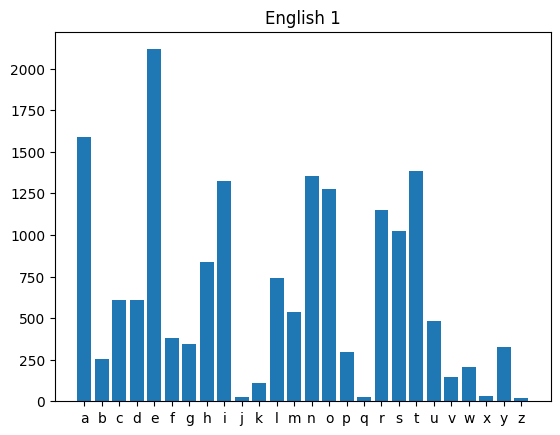

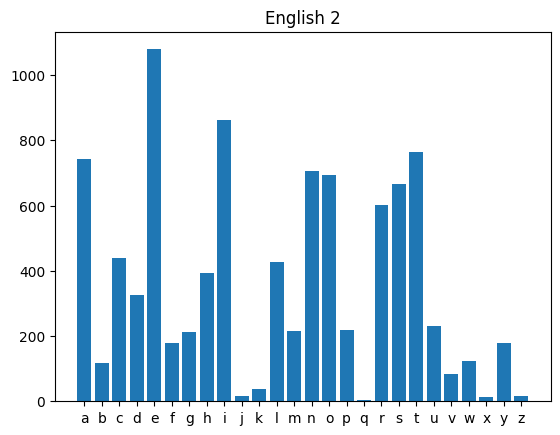

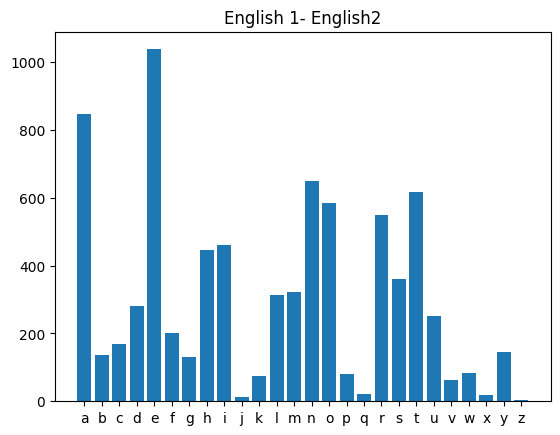

In [18]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

residual_1_eng = unigram_eng1 - unigram_eng2
plothistogram(residual_1_eng)
plt.title('English 1- English2')
plt.show()

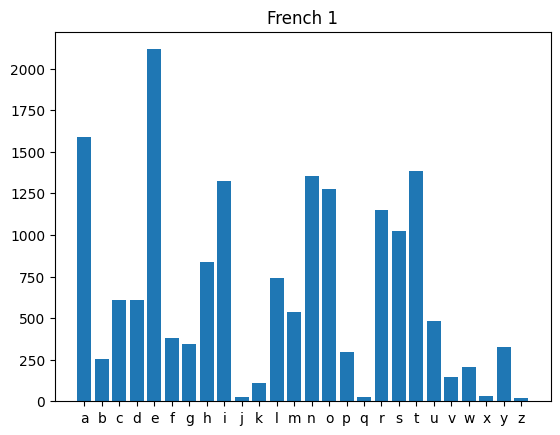

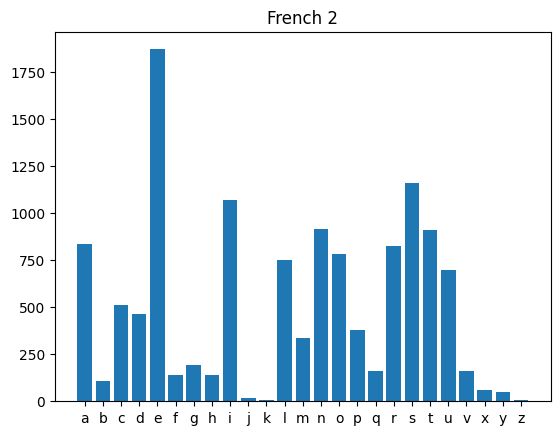

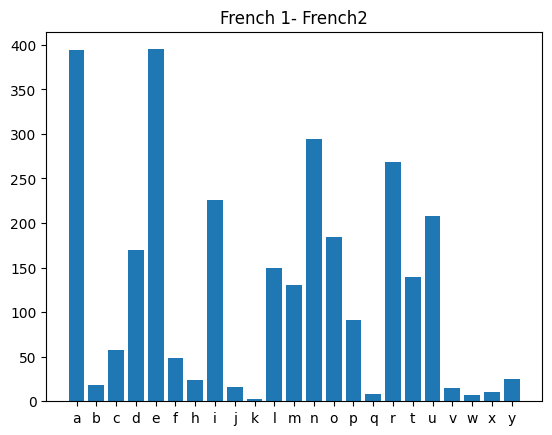

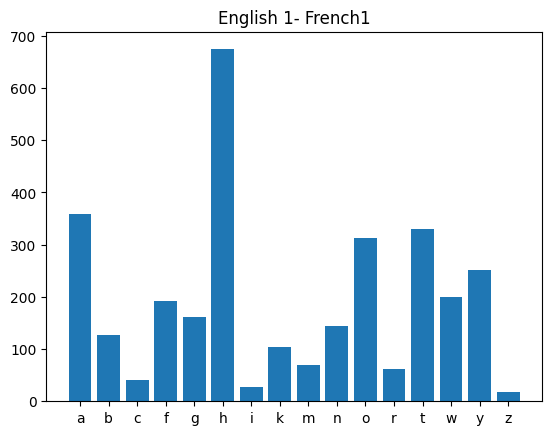

In [19]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

residual_1_2_fr = unigram_fr1 - unigram_fr2
plothistogram(residual_1_2_fr)
plt.title('French 1- French2')
plt.show()

residual_1_1 = unigram_eng1 - unigram_fr1
plothistogram(residual_1_1)
plt.title('English 1- French1')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

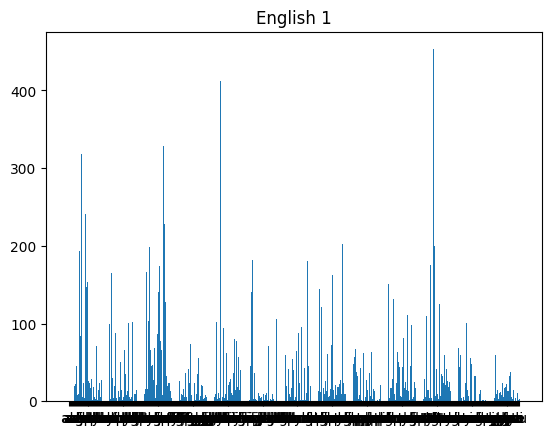

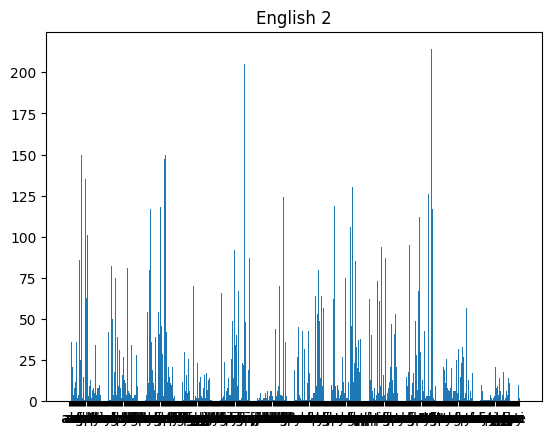

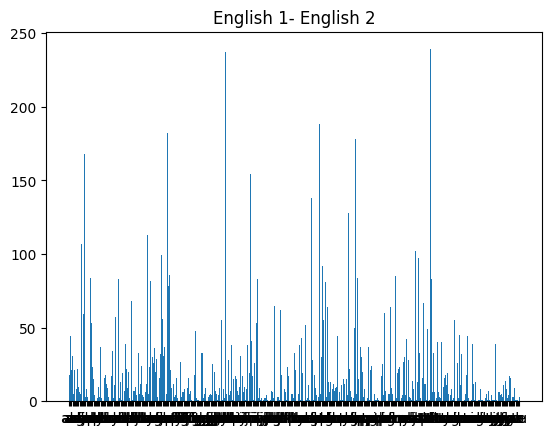

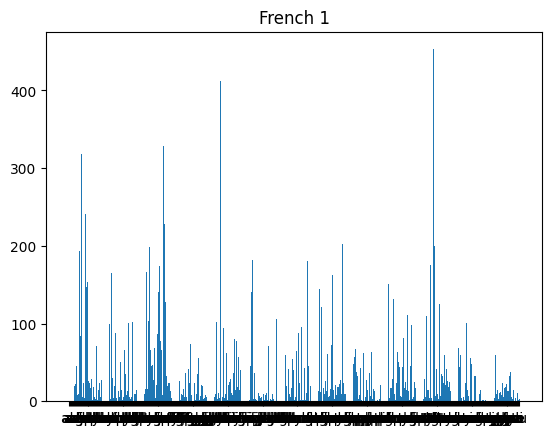

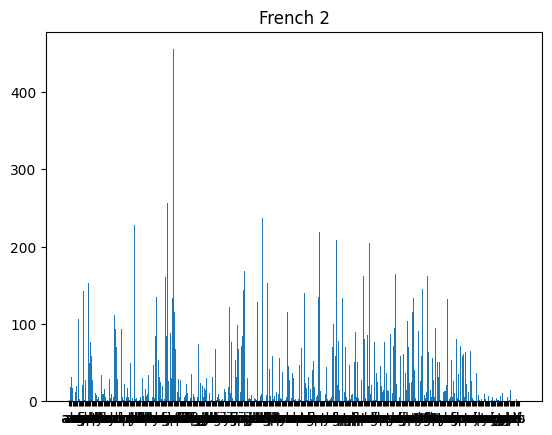

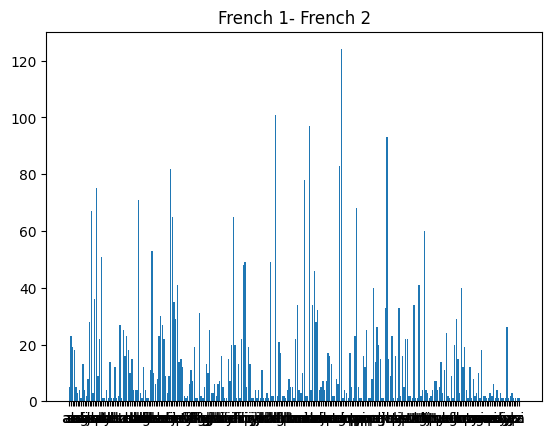

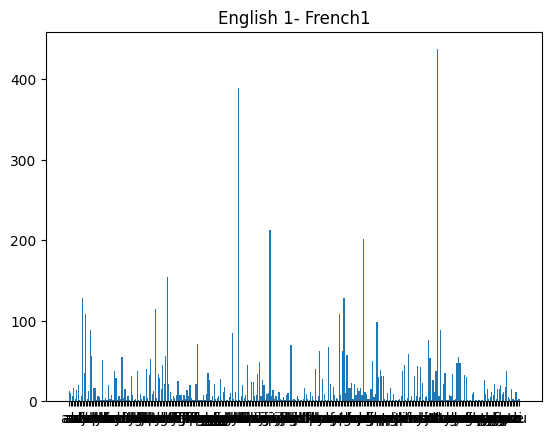

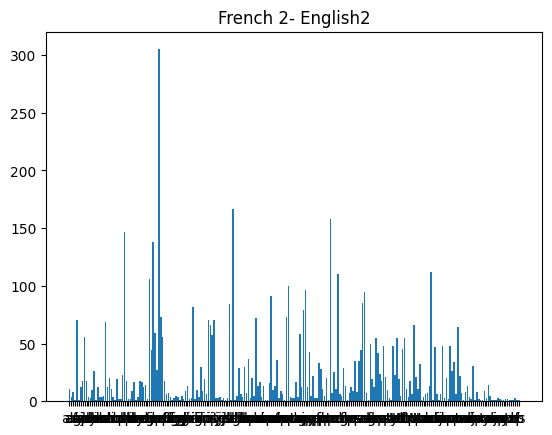

In [20]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_eng_1_2 = bigram_eng1 - bigram_eng2
plothistogram(bigram_eng_1_2)
plt.title('English 1- English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

bigram_fr_1_2 = bigram_fr1 - bigram_fr2
plothistogram(bigram_fr_1_2)
plt.title('French 1- French 2')
plt.show()

residual_1_1 = bigram_eng1 - bigram_fr1
plothistogram(residual_1_1)
plt.title('English 1- French1')
plt.show()

residual_1_1 = bigram_fr2 - bigram_eng2
plothistogram(residual_1_1)
plt.title('French 2- English2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [21]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

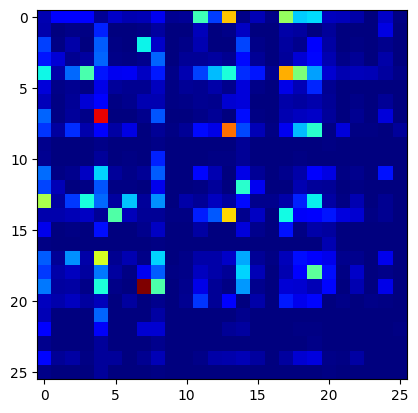

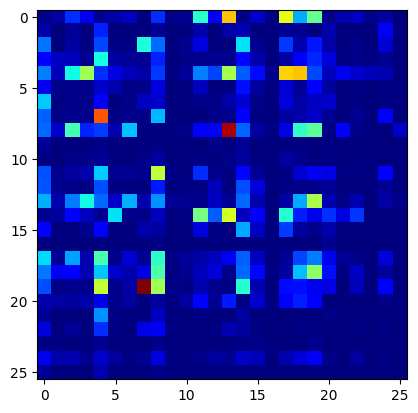

In [22]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)


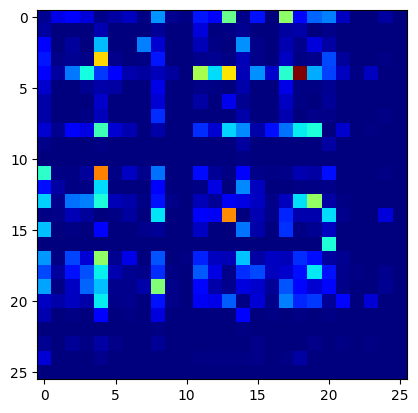

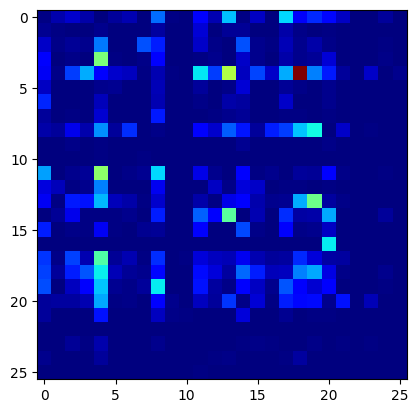

In [23]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

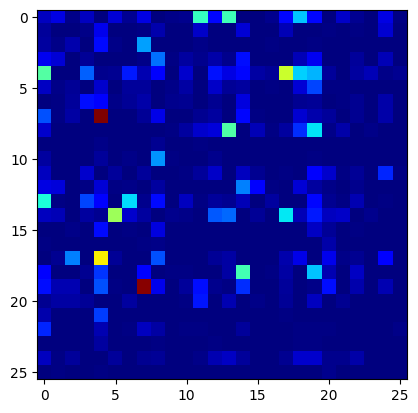

In [24]:
#2d heatmap for (eng1-eng2) -(fr1 -fr2)Bigram
bieng1_2_fr1_2 = plotbihistogram(bigram_eng_1_2 - bigram_fr_1_2)


Let us look at the top 10 ngrams for each text.

In [25]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [26]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 453.0
('h', 'e') : 412.0
('i', 'n') : 359.0
('e', 'r') : 329.0
('a', 'n') : 318.0
('o', 'n') : 308.0
('r', 'e') : 275.0
('n', 'a') : 252.0
('a', 'r') : 241.0
('e', 's') : 228.0

English 2:
('t', 'h') : 214.0
('i', 'n') : 205.0
('h', 'e') : 175.0
('e', 's') : 150.0
('a', 'n') : 150.0
('e', 'r') : 147.0
('a', 'r') : 135.0
('o', 'n') : 130.0
('t', 'e') : 126.0
('l', 'i') : 124.0

French 1:
('e', 's') : 438.0
('l', 'e') : 338.0
('o', 'n') : 333.0
('d', 'e') : 299.0
('e', 'n') : 291.0
('e', 'l') : 242.0
('n', 't') : 232.0
('r', 'e') : 230.0
('a', 'r') : 228.0
('t', 'i') : 222.0

French 2:
('e', 's') : 455.0
('e', 'n') : 256.0
('l', 'e') : 237.0
('d', 'e') : 228.0
('n', 't') : 219.0
('o', 'n') : 209.0
('r', 'e') : 204.0
('i', 't') : 169.0
('s', 'e') : 164.0
('t', 'i') : 162.0


In [31]:
import wikipedia

topic1 = 'Federal Government'
topic2 = 'Republic'

wikipedia.set_lang('de') #de for german language

de1 = wikipedia.page(topic1).content

de2 = wikipedia.page(topic2).content

In [32]:
topic1 = 'Uomo'
topic2 = 'Donna'

wikipedia.set_lang('it')

it1 = wikipedia.page(topic1).content

it2 = wikipedia.page(topic2).content
print(it1[:100])
print(it2[:100])

Homo sapiens (Linnaeus, Systema naturae, 1758; in latino, «uomo sapiente») è la definizione tassonom
La donna è il soggetto adulto di sesso femminile dell'essere umano (Homo sapiens). Si distingue dall


In [33]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [34]:
de1 = cleanup(de1)
de2 = cleanup(de2)
it1 = cleanup(it1)
it2 = cleanup(it2)

In [35]:
print(de1)
print(de2)
print(it1)
print(it2)

dasdepartmentofgovernmentefficiencydogedeutschabteilungfrregierungseffizienzoffiziellusdogeservicetemporaryorganizationisteineorganisationderusadministrationwelchedieregierungseffizienzundproduktivitterhhensowiestaatlicheitsystememodernisierensolldasdogeisttrotzseinesnamenskeinbundesministeriumdepartmentdadessenschaffungdiezustimmungdesuskongresseserfordernwrdeusprsidentdonaldtrumpgrndetedogeamjanuardemerstentagseinerzweitenamtszeitperexecutiveorderalsuntereinheitdesunitedstatesdogeserviceehemalsunitedstatesdigitalservicesiehateinbroimeisenhowerexecutiveofficebuildingundsolltelautankndigungetwamitarbeiterhabenesistunbekanntwerdietatschlicheleitungderabteilunginnehatdieentscheidungsgewaltwirddefactovonelonmuskausgebtderauchdieffentlichkeitsarbeitderabteilungbetreibtpoliticocomschriebamfebruarfrherekommissionenvordogesetztenmehrereprsidentenkommissionenmitderzielsetzungvoneinsparungeneintheodorerooseveltliediekeepcommissioneinberufenderenergebnisseallerdingsseinerzeitweitgehendunbeachtet

In [36]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  # Check if the ngram Counter is empty
  if not ngram:
    print("No data to plot.") # Or you can simply return without plotting
    return

  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)


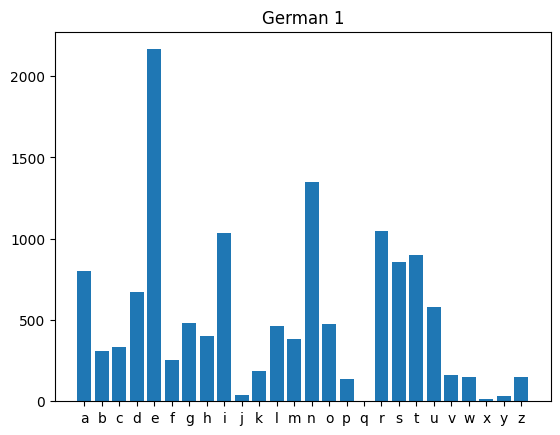

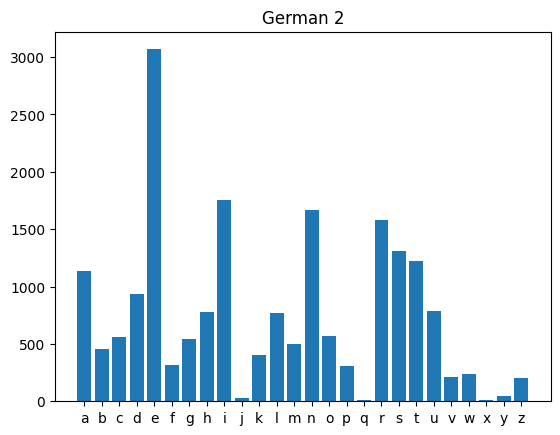

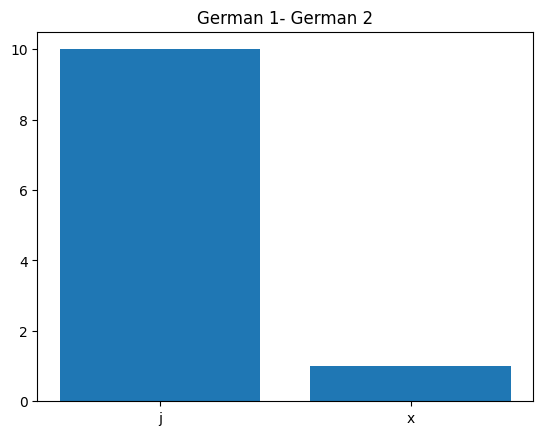

In [39]:
x = Counter(ngrams(de1,1))
plothistogram(x)
plt.title('German 1')
plt.show()

y = Counter(ngrams(de2,1))
plothistogram(y)
plt.title('German 2')
plt.show()

residual_1_1 = x - y
plothistogram(residual_1_1)
plt.title('German 1- German 2')
plt.show()

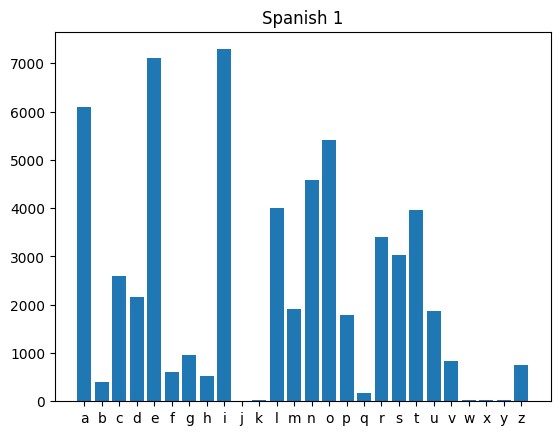

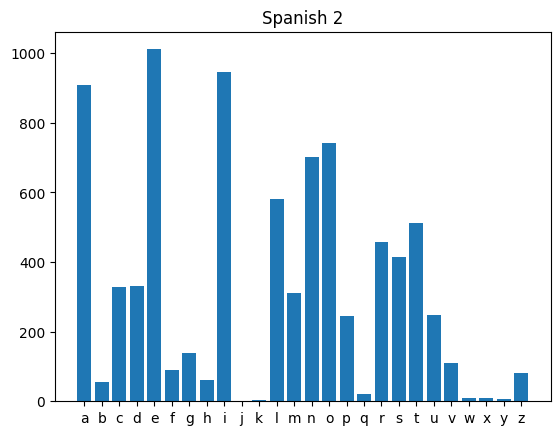

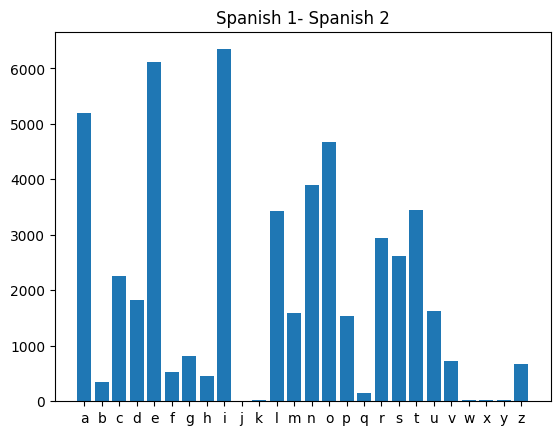

In [40]:
unigram_it1 = Counter(ngrams(it1,1))
plothistogram(unigram_it1)
plt.title('Spanish 1')
plt.show()
unigram_it2 = Counter(ngrams(it2,1))
plothistogram(unigram_it2)
plt.title('Spanish 2')
plt.show()

residual_1_2_it = unigram_it1 - unigram_it2
plothistogram(residual_1_2_it)
plt.title('Spanish 1- Spanish 2')
plt.show()

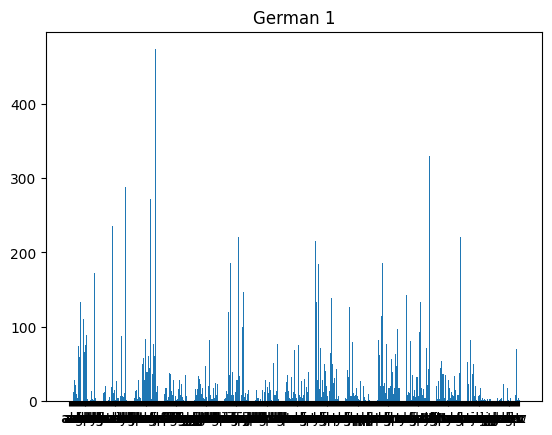

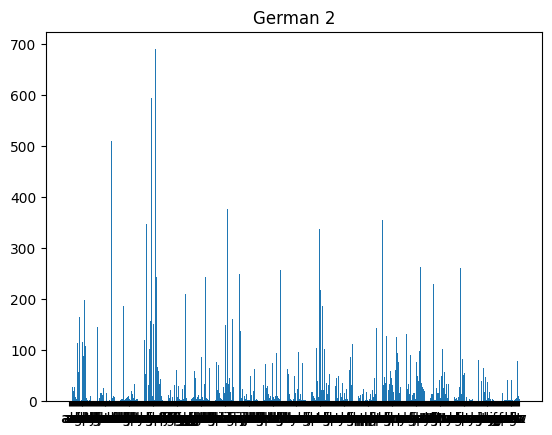

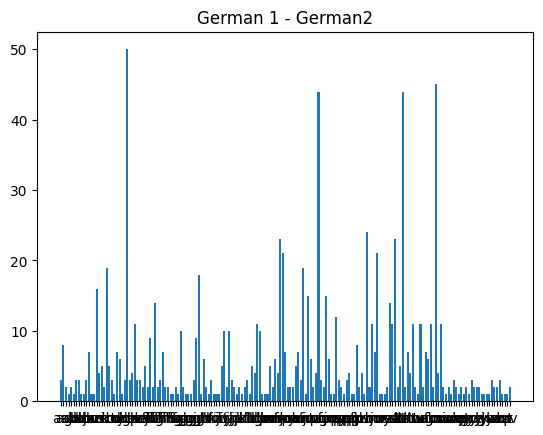

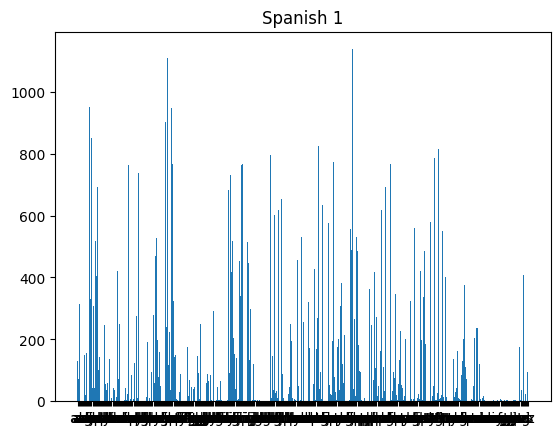

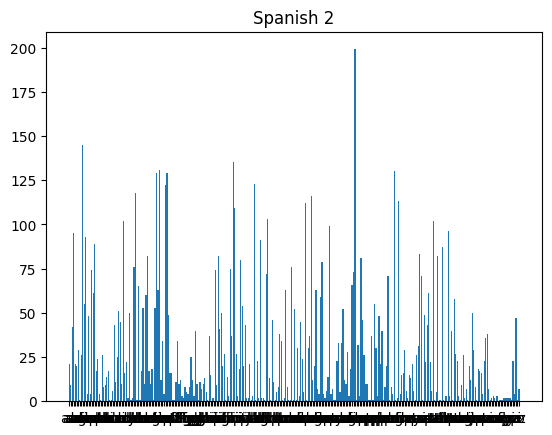

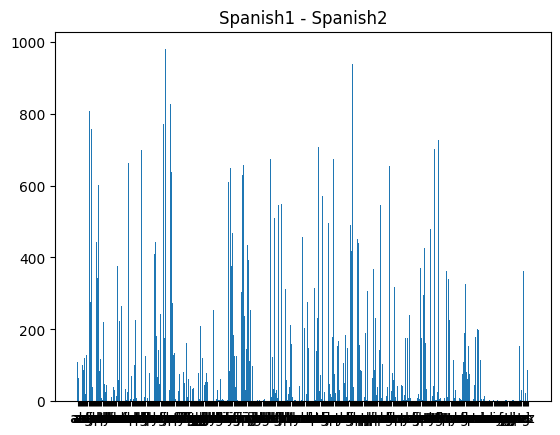

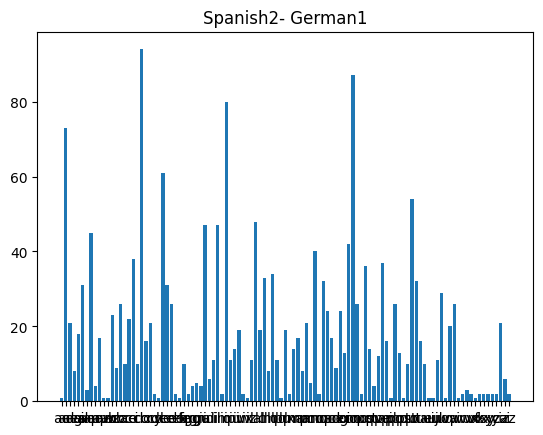

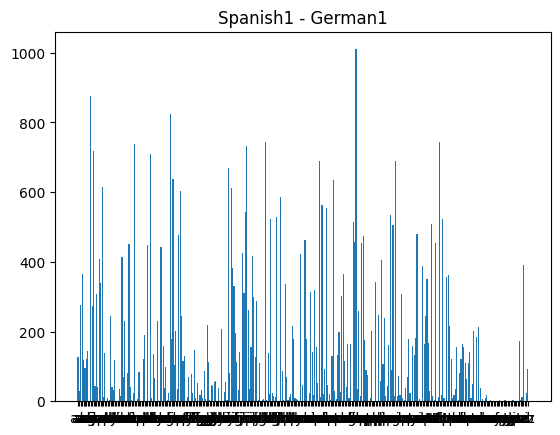

In [42]:
bigram_de1 = Counter(ngrams(de1,2)) # bigrams
plothistogram(bigram_de1)
plt.title('German 1')
plt.show()

bigram_de2 = Counter(ngrams(de2,2))
plothistogram(bigram_de2)
plt.title('German 2')
plt.show()

bigram_de_1_2 = bigram_de1 - bigram_de2
plothistogram(bigram_de_1_2)
plt.title('German 1 - German2')
plt.show()

bigram_it1 = Counter(ngrams(it1,2))
plothistogram(bigram_it1)
plt.title('Spanish 1')
plt.show()

bigram_it2 = Counter(ngrams(it2,2))
plothistogram(bigram_it2)
plt.title('Spanish 2')
plt.show()

bigram_it_1_2 = bigram_it1 - bigram_it2
plothistogram(bigram_it_1_2)
plt.title('Spanish1 - Spanish2')
plt.show()

residual_2_2 = bigram_it2- bigram_de2
plothistogram(residual_2_2)
plt.title('Spanish2- German1')
plt.show()

residual_1_1 = bigram_it1 - bigram_de1
plothistogram(residual_1_1)
plt.title('Spanish1 - German1')
plt.show()

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [43]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [44]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

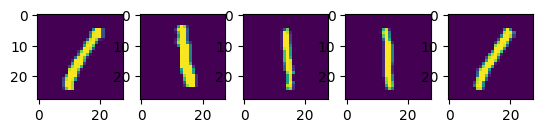

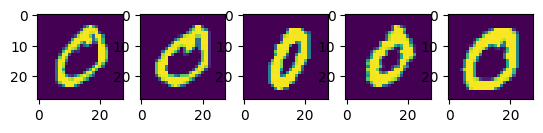

In [45]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [46]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

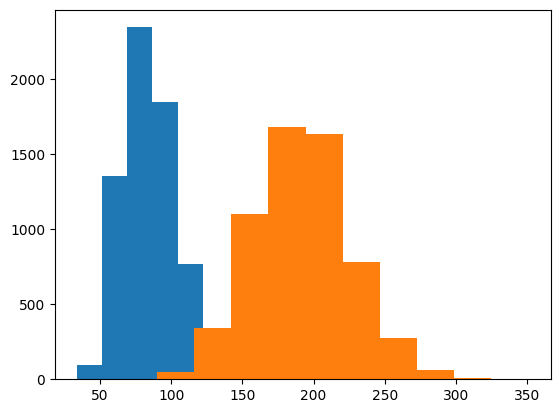

In [48]:
plt.hist(sum1, alpha=1.0);
plt.hist(sum0, alpha=1.0);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [49]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

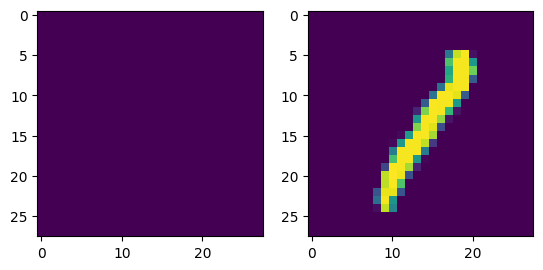

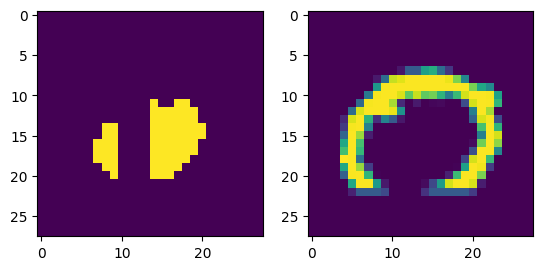

In [50]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

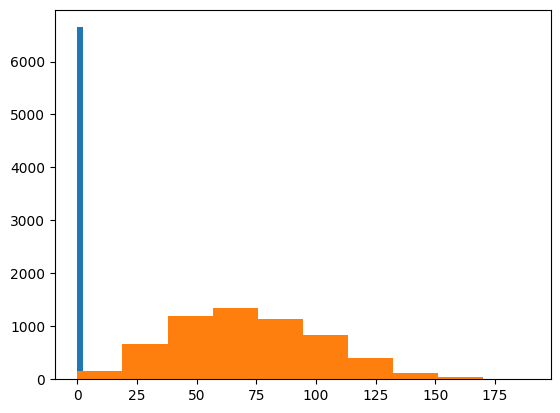

In [52]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=1.0);
plt.hist(hole0, alpha=1.0);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [53]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

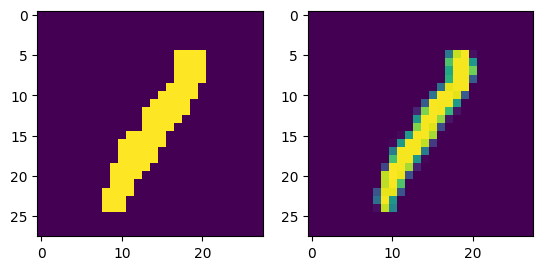

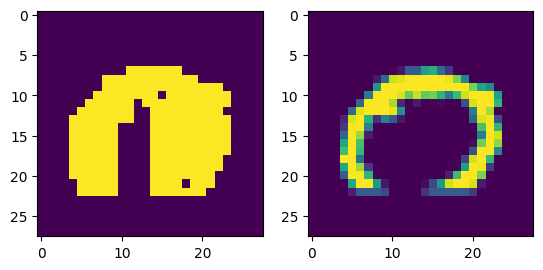

In [54]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

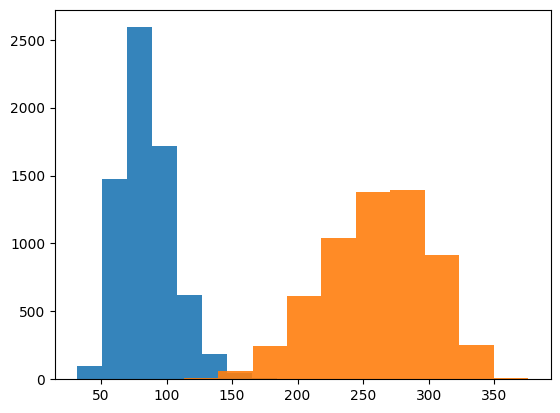

In [55]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.9);
plt.hist(hull0, alpha=0.9);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [56]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

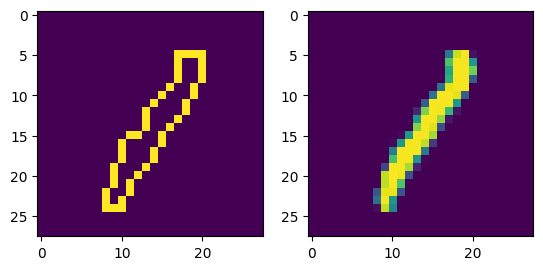

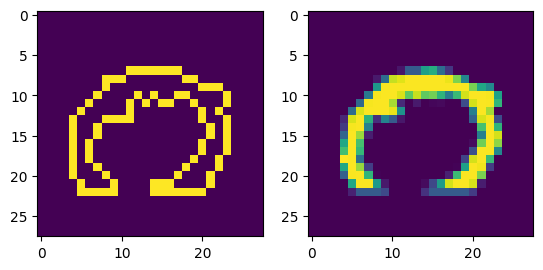

In [57]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

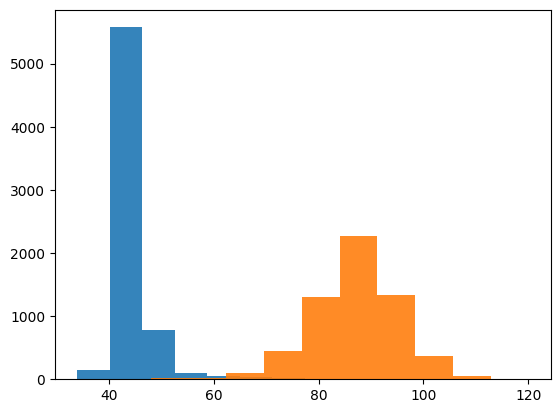

In [58]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.9);
plt.hist(bound0, alpha=0.9);

What will happen if we plot two features together?

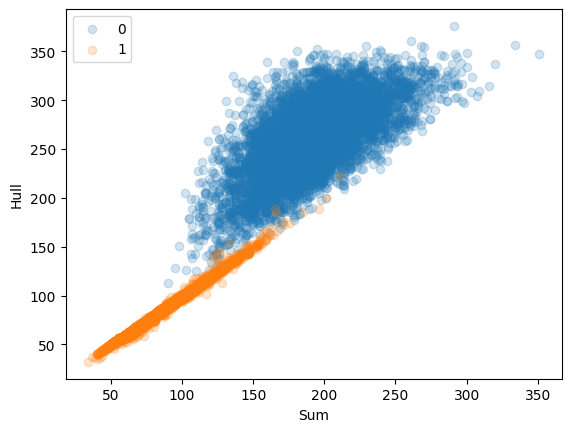

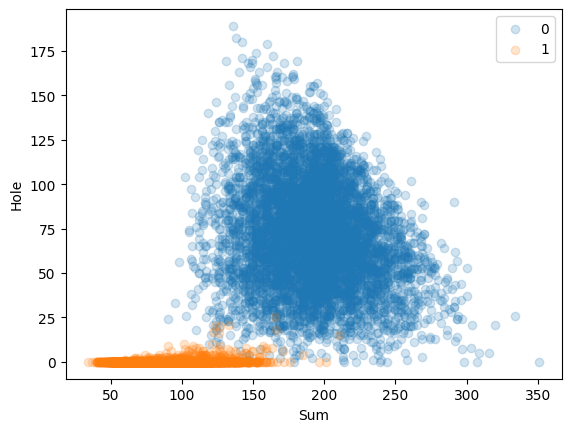

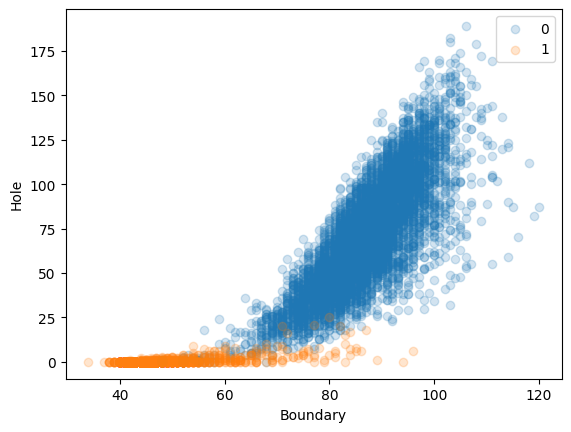

In [59]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.2)
plt.scatter(sum1, hull1, alpha=0.2)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.2)
plt.scatter(sum1, hole1, alpha=0.2)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.2)
plt.scatter(bound1, hole1, alpha=0.2)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [60]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?